# Project 4: Quantifying Impact of EV Charging Stations on Air Quality

## Part II - Exploratory Data Analysis (EDA)

Authors: Aichieh Lin, Bede Young, and Charles Ramey

Date: 05/05/2023

---

#### Notebook Links

Part I - Project Intro & Data Cleaning
- [`Part-1_setup-and-cleaning.ipynb`](../code/Part-1_setup-and-cleaning.ipynb)

Part III - Modeling
- [`Part-3_modeling.ipynb`](../code/Part-3_modeling.ipynb)

Part IV - Conclusion, Recommendations, and Sources
- [`Part-4_conclusion-and-recommendations.ipynb`](../code/Part-4_conclusion-and-recommendations.ipynb)

### Contents

- [Data Import and Additional Cleaning](#Data-Import-and-Additional-Cleaning)
- [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))

## Data Import and Additional Cleaning

### Library Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import geopandas
from ipywidgets import interactive, IntSlider, Output
import scipy as scp

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_1310/2585754887.py:9: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://s

### Data Import

In [2]:
aqi = pd.read_csv('../output/air_quality_by_state.csv')
aqi.head()

,state,year,days_with_aqi,max_aqi,90th_percentile_aqi,median_aqi,pct_good_days,pct_moderate_days,pct_unhealthy_for_sensitive_groups_days,pct_unhealthy_days,pct_very_unhealthy_days,pct_hazardous_days,pct_days_co,pct_days_no2,pct_days_ozone,pct_days_pm2.5,pct_days_pm10,pct_bad_days
0,Alabama,2000,201.090909,151.136364,95.818182,52.727273,0.460557,0.439145,0.086704,0.012601,0.000994,0.0,0.005216,0.003041,0.387520,0.478625,0.125597,0.539443
1,Alabama,2001,219.000000,137.047619,80.523810,45.571429,0.595764,0.360452,0.036892,0.005848,0.001044,0.0,0.008871,0.001003,0.444249,0.426518,0.119359,0.404236
2,Alabama,2002,238.818182,143.818182,79.636364,42.909091,0.640923,0.308082,0.044374,0.006334,0.000286,0.0,0.007181,0.003711,0.509011,0.364713,0.115384,0.359077
3,Alabama,2003,234.000000,132.750000,73.500000,43.416667,0.631339,0.338255,0.028684,0.001721,0.000000,0.0,0.004489,0.001829,0.486147,0.402407,0.105127,0.368661
4,Alabama,2004,236.800000,120.200000,69.800000,42.280000,0.684022,0.293580,0.021230,0.001057,0.000111,0.0,0.001093,0.003191,0.523395,0.375292,0.097029,0.315978


In [3]:
vc = pd.read_csv('../output/vehicle_counts_by_state.csv')
vc.head()

,State,Year,EV,PHEV,HEV,Biodiesel,E85,CNG,Propane,Hydrogen,Methanol,Gasoline,Diesel
0,Alabama,2021,"4,700","3,300","42,500","40,500","449,500",500,100,0,0,"4,051,000","123,500"
1,Alaska,2021,"1,300",500,"7,300","7,600","50,100",100,0,0,0,"464,200","31,700"
2,Arizona,2021,"40,700","15,500","132,200","51,000","460,400",900,900,0,0,"5,395,300","191,800"
3,Arkansas,2021,"2,400","1,800","26,100","28,700","290,200",300,0,0,0,"2,241,600","88,800"
4,California,2021,"563,100","315,300","1,355,900","163,600","1,343,200","12,600","1,500","11,800",0,"30,512,600","710,500"


In [4]:
st_stations = pd.read_csv('../output/station_counts_by_state.csv')
st_stations.head()

,State,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,year
0,Alabama,10.0,30.0,31.0,848,0.0,2.0,62.0,983.0,2022
1,Alaska,0.0,1.0,0.0,115,0.0,0.0,2.0,118.0,2022
2,Arizona,75.0,28.0,17.0,"2,638",1.0,5.0,65.0,2829.0,2022
3,Arkansas,17.0,10.0,74.0,598,0.0,0.0,36.0,735.0,2022
4,California,32.0,314.0,326.0,"43,400",58.0,40.0,246.0,44416.0,2022


### Additional Cleaning

In [5]:
vc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      306 non-null    object
 1   Year       306 non-null    int64 
 2   EV         306 non-null    object
 3   PHEV       306 non-null    object
 4   HEV        306 non-null    object
 5   Biodiesel  306 non-null    object
 6   E85        306 non-null    object
 7   CNG        306 non-null    object
 8   Propane    306 non-null    object
 9   Hydrogen   306 non-null    object
 10  Methanol   306 non-null    int64 
 11  Gasoline   306 non-null    object
 12  Diesel     306 non-null    object
dtypes: int64(2), object(11)
memory usage: 31.2+ KB


In [6]:
df_obj = vc.iloc[:, 2:].select_dtypes(include=['object'])
vc[df_obj.columns] = df_obj.apply(lambda x: x.str.replace(',', '').astype(int))

In [7]:
vc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      306 non-null    object
 1   Year       306 non-null    int64 
 2   EV         306 non-null    int64 
 3   PHEV       306 non-null    int64 
 4   HEV        306 non-null    int64 
 5   Biodiesel  306 non-null    int64 
 6   E85        306 non-null    int64 
 7   CNG        306 non-null    int64 
 8   Propane    306 non-null    int64 
 9   Hydrogen   306 non-null    int64 
 10  Methanol   306 non-null    int64 
 11  Gasoline   306 non-null    int64 
 12  Diesel     306 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 31.2+ KB


In [8]:
vc.columns = [col.lower().replace(' ','_') for col in vc.columns]

In [9]:
vc['total'] = vc.iloc[:, 2:].sum(axis=1)

In [10]:
vc

,state,year,ev,phev,hev,biodiesel,e85,cng,propane,hydrogen,methanol,gasoline,diesel,total
0,Alabama,2021,4700,3300,42500,40500,449500,500,100,0,0,4051000,123500,4715600
1,Alaska,2021,1300,500,7300,7600,50100,100,0,0,0,464200,31700,562800
2,Arizona,2021,40700,15500,132200,51000,460400,900,900,0,0,5395300,191800,6288700
3,Arkansas,2021,2400,1800,26100,28700,290200,300,0,0,0,2241600,88800,2679900
4,California,2021,563100,315300,1355900,163600,1343200,12600,1500,11800,0,30512600,710500,34990100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Virginia,2016,3100,4200,126700,0,463300,17900,0,0,0,6554200,168900,7338300
302,Washington,2016,14900,6400,143400,0,304100,24400,0,0,0,5329200,272100,6094500
303,West Virginia,2016,100,300,9200,0,150300,4400,0,0,0,1286500,52000,1502800
304,Wisconsin,2016,2600,2600,61700,0,579200,14400,0,0,0,4500500,154400,5315400


In [11]:
st_stations.columns = st_stations.columns.str.lower()

In [12]:
st_stations.electric = st_stations.electric.str.replace(',', '').astype(float)

In [13]:
stations_electric = st_stations.groupby('state').mean()

In [14]:
stations_electric.reset_index(inplace=True)

In [15]:
stations_electric.head()

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
1,Alaska,1.8125,3.8125,4.8125,26.3125,0.0000,0.3125,24.6875,61.7500,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5


---
## Exploratory Data Analysis (EDA)

In [16]:
air_quality_cols = [
    'pct_good_days', 
    'pct_moderate_days',
    'pct_unhealthy_for_sensitive_groups_days',
    'pct_unhealthy_days',
    'pct_very_unhealthy_days',
    'pct_hazardous_days'
]

# Average annual share of days by air quality
for col in air_quality_cols:
    avg_pct = aqi[col].mean()
    print(f"Average {col}: {avg_pct:.2f}")

Average pct_good_days: 0.77
Average pct_moderate_days: 0.21
Average pct_unhealthy_for_sensitive_groups_days: 0.02
Average pct_unhealthy_days: 0.00
Average pct_very_unhealthy_days: 0.00
Average pct_hazardous_days: 0.00


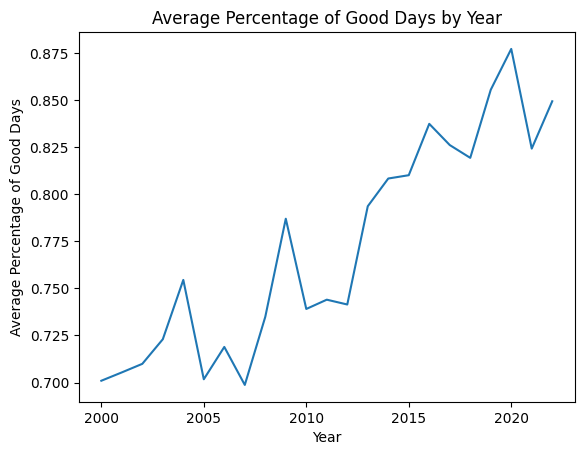

In [17]:
# Group the data by year and calculate the mean of the good_days column for each year
mean_good_days_by_year = aqi.groupby('year')['pct_good_days'].mean()

# Create a line plot
plt.plot(mean_good_days_by_year.index, mean_good_days_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Percentage of Good Days')
plt.title('Average Percentage of Good Days by Year')
plt.show();

In [18]:
# Group the DataFrame by state and calculate the average max_aqi for each group
avg_max_aqi = aqi.groupby('state')['max_aqi'].mean()

# Sort the DataFrame by average max_aqi in descending order and print the top three rows
highest_avg_max_aqi = avg_max_aqi.sort_values(ascending=False).head(3)
print("States with highest average max_aqi:")
print(highest_avg_max_aqi)

print(' ')

# Sort the DataFrame by average max_aqi in ascending order and print the bottom three rows
lowest_avg_max_aqi = avg_max_aqi.sort_values().head(3)
print("States with lowest average max_aqi:")
print(lowest_avg_max_aqi);

States with highest average max_aqi:
state
District Of Columbia    165.521739
Connecticut             164.516304
California              161.149189
Name: max_aqi, dtype: float64
 
States with lowest average max_aqi:
state
Nebraska        87.812613
Hawaii          90.188406
North Dakota    92.269192
Name: max_aqi, dtype: float64


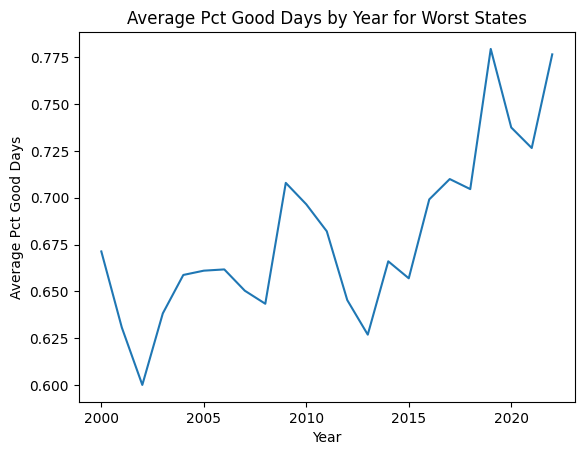

In [19]:
worst_states = ['District of Columbia', 'Connecticut', 'California']

# Filter the dataframe to only include the worst states
worst_states_df = aqi[aqi['state'].isin(worst_states)]

# Group by year and calculate the mean pct_good_days for each year
pct_good_days_by_year = worst_states_df.groupby('year')['pct_good_days'].mean()

# Plot the line graph
plt.plot(pct_good_days_by_year.index, pct_good_days_by_year.values)
plt.title('Average Pct Good Days by Year for Worst States')
plt.xlabel('Year')
plt.ylabel('Average Pct Good Days')
plt.show;

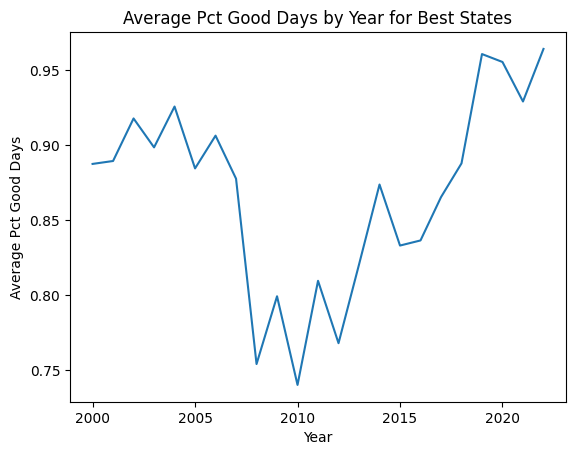

In [20]:
best_states = ['Virgin Islands', 'Nebraska', 'Hawaii']

# Filter the dataframe to only include the worst states
best_states_df = aqi[aqi['state'].isin(best_states)]

# Group by year and calculate the mean pct_good_days for each year
pct_good_days_by_year = best_states_df.groupby('year')['pct_good_days'].mean()

# Plot the line graph
plt.plot(pct_good_days_by_year.index, pct_good_days_by_year.values)
plt.title('Average Pct Good Days by Year for Best States')
plt.xlabel('Year')
plt.ylabel('Average Pct Good Days')
plt.show;

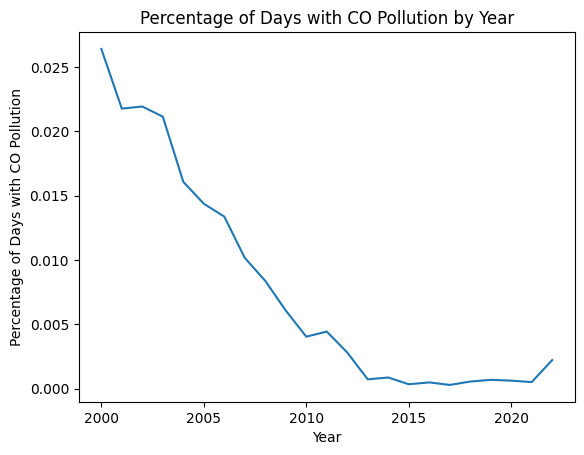

In [21]:
plt.plot(aqi.groupby('year')['pct_days_co'].mean())
plt.title('Percentage of Days with CO Pollution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with CO Pollution')
plt.show();

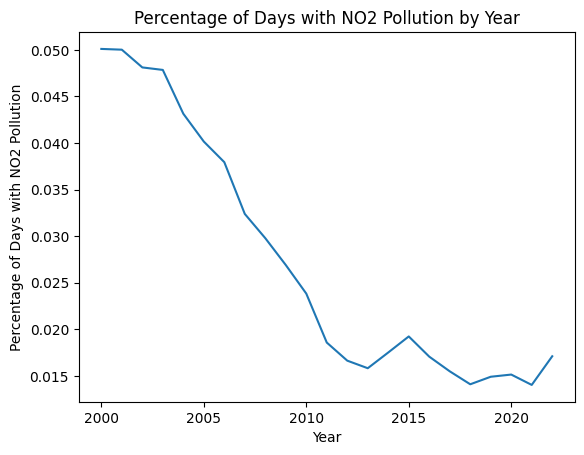

In [22]:
plt.plot(aqi.groupby('year')['pct_days_no2'].mean())
plt.title('Percentage of Days with NO2 Pollution by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with NO2 Pollution')
plt.show();

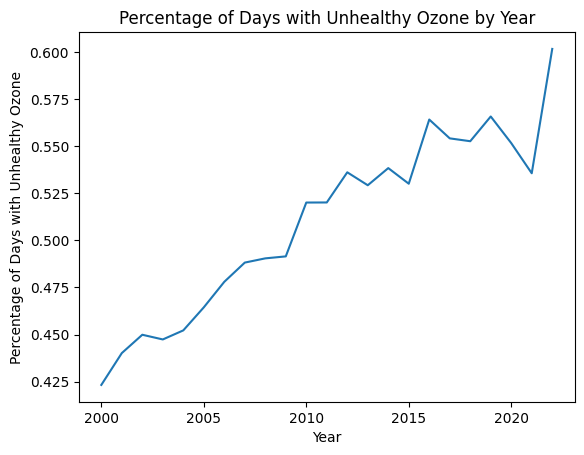

In [23]:
plt.plot(aqi.groupby('year')['pct_days_ozone'].mean())
plt.title('Percentage of Days with Unhealthy Ozone by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with Unhealthy Ozone')
plt.show();

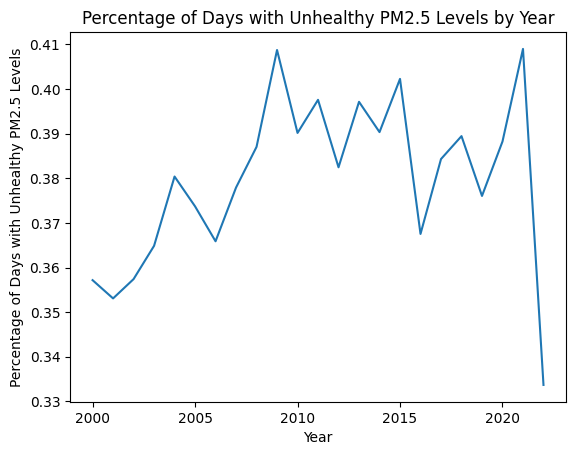

In [24]:
plt.plot(aqi.groupby('year')['pct_days_pm2.5'].mean())
plt.title('Percentage of Days with Unhealthy PM2.5 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with Unhealthy PM2.5 Levels')
plt.show();

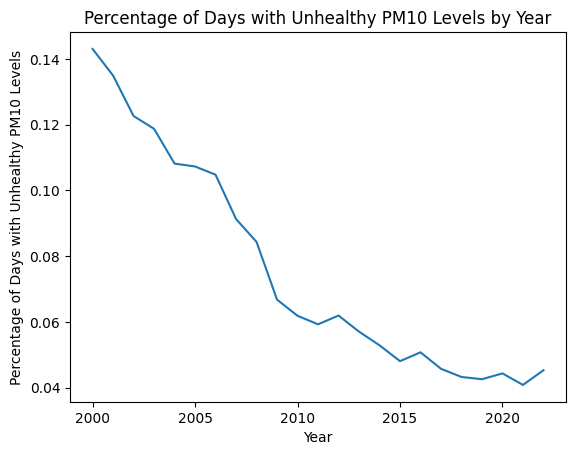

In [25]:
plt.plot(aqi.groupby('year')['pct_days_pm10'].mean())
plt.title('Percentage of Days with Unhealthy PM10 Levels by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Days with Unhealthy PM10 Levels')
plt.show();

In [26]:
# Top 3 states with highest ev count
vc[vc['year'] == 2021].groupby('state')['ev'].sum().nlargest(3)

state
California    563100
Florida        95600
Texas          80900
Name: ev, dtype: int64

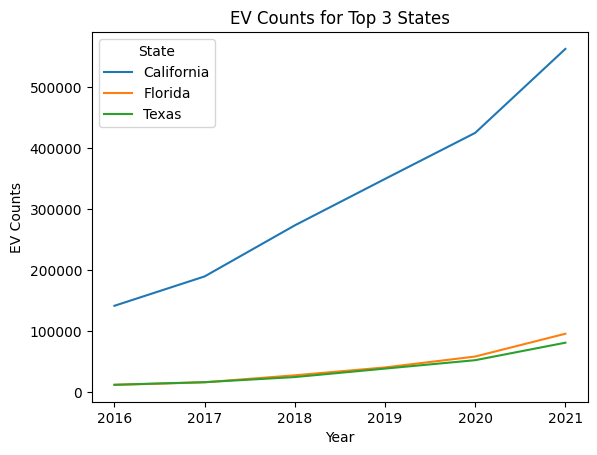

In [27]:
top_3_states = ['California', 'Florida', 'Texas']
filtered_df = vc[vc['state'].isin(top_3_states)]

fig, ax = plt.subplots()

# Loop over each state in the top 3 states
for state in top_3_states:
    # Filter the data for the current state
    state_data = filtered_df[filtered_df['state'] == state]
    # Plot the data as a line plot with year on the x-axis and ev on the y-axis
    ax.plot(state_data['year'], state_data['ev'], label=state)

# Add x and y axis labels and a legend
ax.set_title('EV Counts for Top 3 States')
ax.set_xlabel('Year')
ax.set_ylabel('EV Counts')
ax.legend(title='State')
ax.set_xticks(range(2016, 2022))

plt.show();

In [28]:
# Bottom 3 states with highest ev count
vc[vc['year'] == 2021].groupby('state')['ev'].sum().nsmallest(3)

state
North Dakota    400
Wyoming         500
South Dakota    700
Name: ev, dtype: int64

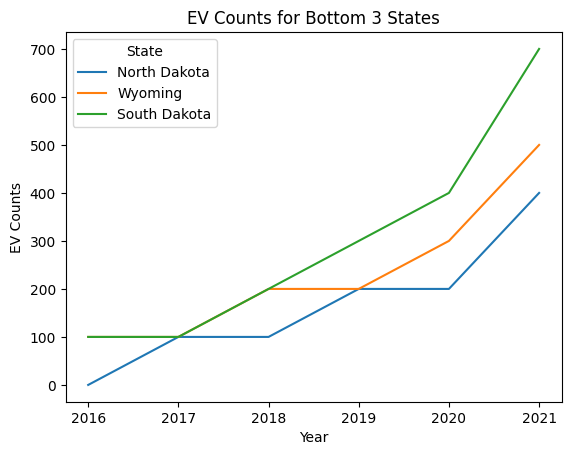

In [29]:
bottom_3_states = ['North Dakota', 'Wyoming', 'South Dakota']
filtered_df = vc[vc['state'].isin(bottom_3_states)]

fig, ax = plt.subplots()

# Loop over each state in the bottom 3 states
for state in bottom_3_states:
    # Filter the data for the current state
    state_data = filtered_df[filtered_df['state'] == state]
    # Plot the data as a line plot with year on the x-axis and ev on the y-axis
    ax.plot(state_data['year'], state_data['ev'], label=state)

# Add x and y axis labels and a legend
ax.set_title('EV Counts for Bottom 3 States')
ax.set_xlabel('Year')
ax.set_ylabel('EV Counts')
ax.legend(title='State')
ax.set_xticks(range(2016, 2022))

plt.show();

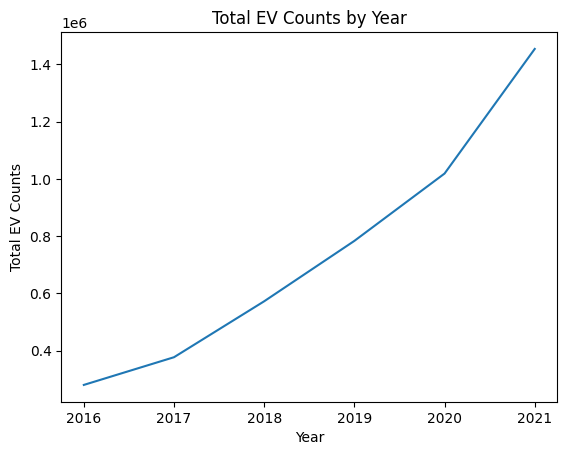

In [30]:
vc.groupby('year')['ev'].sum().plot(kind='line', title='Total EV Counts by Year')

plt.xlabel('Year')
plt.ylabel('Total EV Counts')
plt.show();

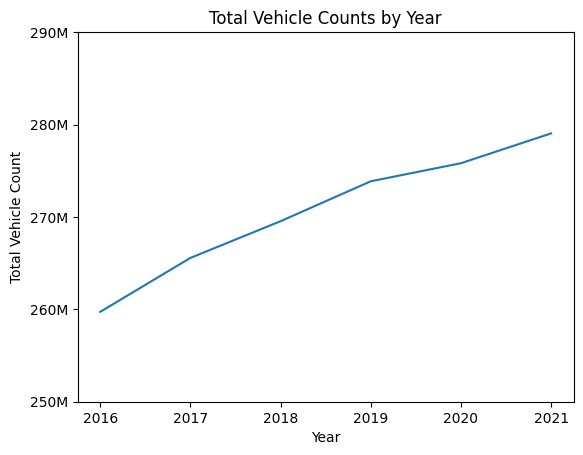

In [31]:
total_counts_by_year = vc.groupby('year')['total'].sum()

ax = total_counts_by_year.plot(kind='line', title='Total Vehicle Counts by Year')

ax.set_xlabel('Year')
ax.set_ylabel('Total Vehicle Count')
ax.set_yticks([250000000, 260000000, 270000000, 280000000, 290000000], 
           ['250M', '260M', '270M', '280M', '290M']);

plt.show();

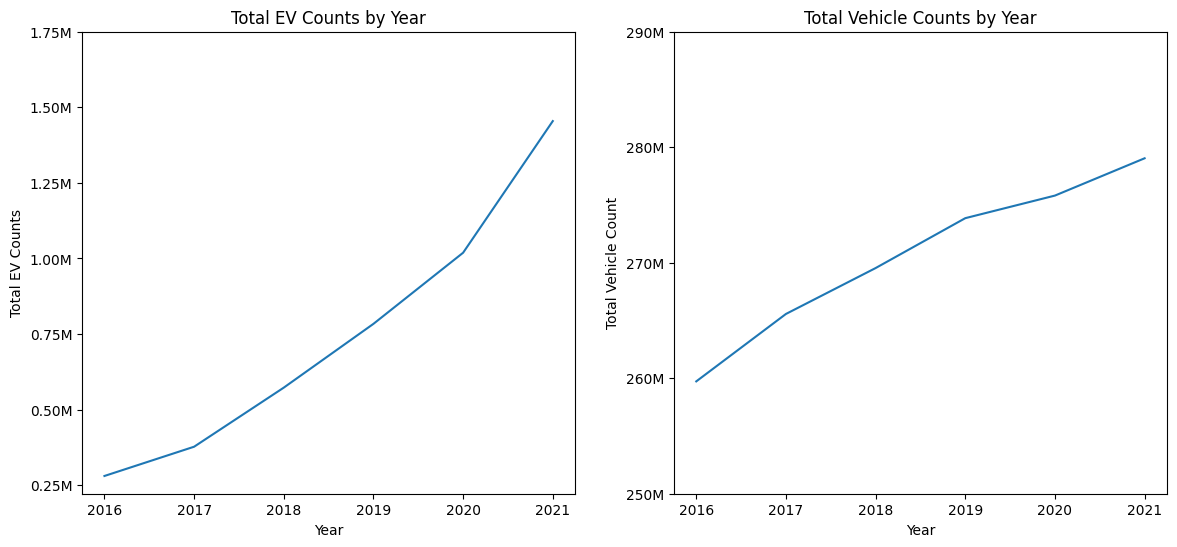

In [32]:
# Create a figure and two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first subplot (total EV counts by year)
vc.groupby('year')['ev'].sum().plot(ax=ax1, kind='line', title='Total EV Counts by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total EV Counts')
ax1.set_yticks([250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000], 
               ['0.25M', '0.50M', '0.75M', '1.00M', '1.25M', '1.50M', '1.75M'])

# Plot the second subplot (total vehicle counts by year)
total_counts_by_year = vc.groupby('year')['total'].sum()
total_counts_by_year.plot(ax=ax2, kind='line', title='Total Vehicle Counts by Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Vehicle Count')
ax2.set_yticks([250000000, 260000000, 270000000, 280000000, 290000000], 
               ['250M', '260M', '270M', '280M', '290M'])

# Display the plots
plt.show();

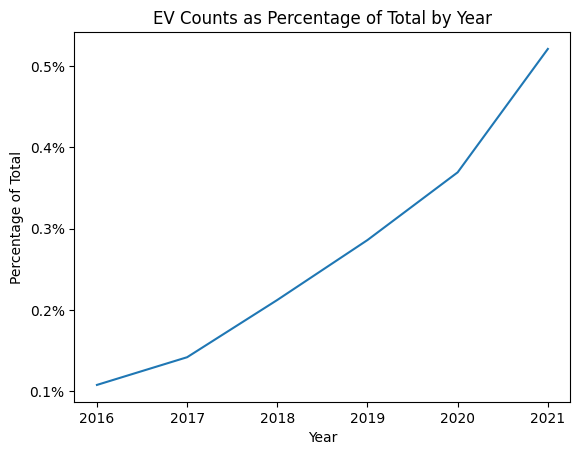

In [33]:
ev_counts = vc.groupby('year')['ev'].sum()
total_counts = vc.groupby('year')['total'].sum()
ev_percentage = (ev_counts / total_counts) * 100

# plot the results
plt.figure()
plt.plot(ev_percentage.index, ev_percentage.values, label='EV Percentage')
plt.xlabel('Year')
plt.ylabel('Percentage of Total')
plt.title('EV Counts as Percentage of Total by Year')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5], 
           ['0.1%', '0.2%', '0.3%', '0.4%', '0.5%'])
plt.show();

In [34]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

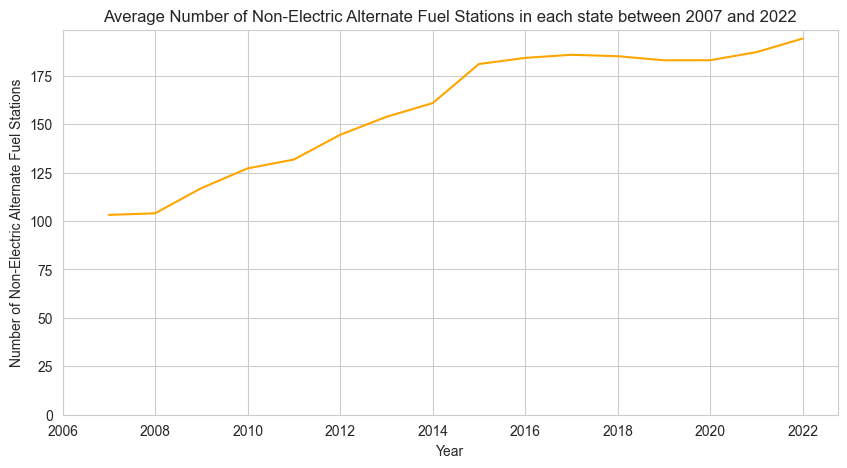

In [35]:
plt.figure(figsize = (10, 5))

plt.plot(st_stations.drop(columns='state').groupby('year').mean().total - st_stations.drop(columns='state').groupby('year').mean().electric, color = 'orange')
plt.xlim(2006)
plt.ylim(0)
plt.title('Average Number of Non-Electric Alternate Fuel Stations in each state between 2007 and 2022')
plt.xlabel('Year')
plt.ylabel('Number of Non-Electric Alternate Fuel Stations');

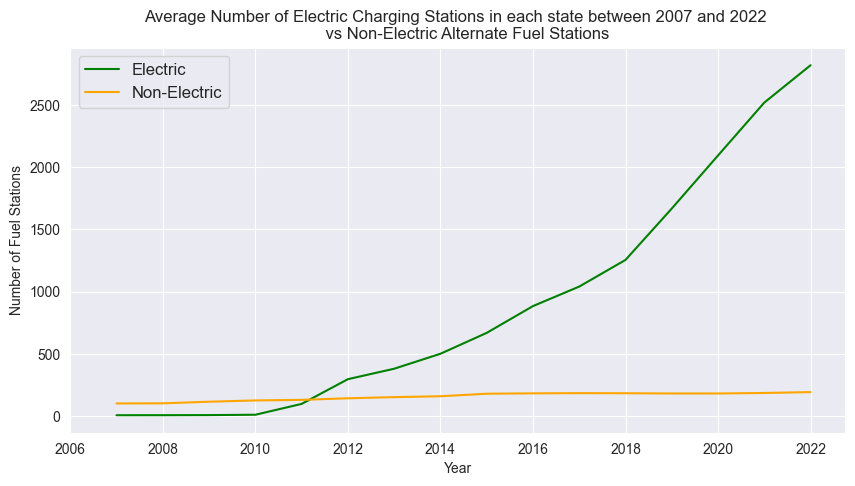

In [102]:
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')
plt.plot(st_stations.drop(columns='state').groupby('year').mean().electric, color = 'green', label = 'Electric')
plt.plot(st_stations.drop(columns='state').groupby('year').mean().total - st_stations.drop(columns='state').groupby('year').mean().electric, 
         color = 'orange',
        label = 'Non-Electric')

plt.xlim(2006)
plt.title('''Average Number of Electric Charging Stations in each state between 2007 and 2022 
    vs Non-Electric Alternate Fuel Stations''')
plt.xlabel('Year')
plt.ylabel('Number of Fuel Stations')
plt.legend(fontsize = 12);

- Non-electric alternate fuel stations have increased over time when averaged across all states
- Electric charging stations were far less common than non-electric stations, until 2011 - in which popuularity and availablity of EV charging stations increased dramatically.
- This sharp increase continues for each year

### Geopandas EDA

In [37]:
states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
type(states)

states = states.to_crs("EPSG:3395")

In [38]:
states.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,MULTIPOLYGON Z (((-13201820.240 3933920.113 0....
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-8584932.302 4685414.972 0.000, -8..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,MULTIPOLYGON Z (((-9107236.006 2805107.013 0.0...


In [39]:
stations_electric.drop([1, 11], inplace = True)

In [40]:
stations_electric.head()

,state,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,year
0,Alabama,7.0625,17.6875,21.3125,242.0625,0.0625,1.2500,71.1875,360.6250,2014.5
2,Arizona,46.6875,28.5000,23.9375,822.9375,0.5625,5.2500,66.8750,994.7500,2014.5
3,Arkansas,11.9375,15.1250,36.9375,213.8750,0.1875,1.1875,44.8125,324.0625,2014.5
4,California,44.9375,272.1875,121.6250,14197.5000,33.4375,39.2500,254.5000,14963.4375,2014.5
5,Colorado,14.9375,32.6875,82.8750,1248.3125,1.0000,0.4375,52.7500,1433.0000,2014.5


In [41]:
aq = pd.read_csv('../output/air_quality_by_state.csv')

In [42]:
aq.replace('Alaska', np.nan).dropna(inplace = True)
aq.replace('Hawaii', np.nan).dropna(inplace = True)
aq.replace('District Of Columbia', np.nan).dropna(inplace = True)


- Alaska, Hawaii, and non-US state regions are not available on the geopandas plot, so are removed from aq and population datasets

In [43]:
aq.pct_unhealthy_for_sensitive_groups_days = aq.pct_unhealthy_for_sensitive_groups_days * 100

In [44]:
st_stations.replace('Alaska', np.nan).dropna(inplace = True)
st_stations.replace('Hawaii', np.nan).dropna(inplace = True)


### Population Data merging

---

- In order to compare states effectively, the number of electric charging stations per 10_000 population was required
- population estimates were imported and cleaned, merged and melted into the electric stations dataset
- A new column with the EV charging stations per 10_000 population was made

In [45]:
pops = pd.read_csv('../data/state-populations.csv')
pops2 = pd.read_csv('../data/state-populations-2020-2022.csv')
pops3 = pd.read_excel('../data/state-populations-2000-2010.xls')

In [46]:
pops3.columns = pops3.loc[2,:]

In [47]:
pops3 = pops3.loc[8:58,:]

In [48]:
pops3.head()

2,NaN,NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,NaN,NaN
8,.Alabama,4447207,4452173,4467634.0,4480089.0,4503491.0,4530729.0,4569805.0,4628981.0,4672840.0,4718206.0,4757938.0,4779736,4785298
9,.Alaska,626933,627963,633714.0,642337.0,648414.0,659286.0,666946.0,675302.0,680300.0,687455.0,698895.0,710231,713985
10,.Arizona,5130247,5160586,5273477.0,5396255.0,5510364.0,5652404.0,5839077.0,6029141.0,6167681.0,6280362.0,6343154.0,6392017,6413737
11,.Arkansas,2673293,2678588,2691571.0,2705927.0,2724816.0,2749686.0,2781097.0,2821761.0,2848650.0,2874554.0,2896843.0,2915918,2921606
12,.California,33871653,33987977,34479458.0,34871843.0,35253159.0,35574576.0,35827943.0,36021202.0,36250311.0,36604337.0,36961229.0,37253956,37349363


In [49]:
pops3.columns.values[0] = 0

In [50]:
pops3.head()

2,0.0,NaN,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,NaN,NaN
8,.Alabama,4447207,4452173,4467634.0,4480089.0,4503491.0,4530729.0,4569805.0,4628981.0,4672840.0,4718206.0,4757938.0,4779736,4785298
9,.Alaska,626933,627963,633714.0,642337.0,648414.0,659286.0,666946.0,675302.0,680300.0,687455.0,698895.0,710231,713985
10,.Arizona,5130247,5160586,5273477.0,5396255.0,5510364.0,5652404.0,5839077.0,6029141.0,6167681.0,6280362.0,6343154.0,6392017,6413737
11,.Arkansas,2673293,2678588,2691571.0,2705927.0,2724816.0,2749686.0,2781097.0,2821761.0,2848650.0,2874554.0,2896843.0,2915918,2921606
12,.California,33871653,33987977,34479458.0,34871843.0,35253159.0,35574576.0,35827943.0,36021202.0,36250311.0,36604337.0,36961229.0,37253956,37349363


In [51]:
pops3 = pops3[[0, 2008, 2009]].rename(columns = {
    0.0 : 'name',
    2008.0 : 'popestimate2008',
    2009.0 : 'popestimate2009'
})

In [52]:
pops3.name = pops3.name.str[1:]

In [53]:
pops3 = pops3.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 
              'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia',
              'New England', 'Middle Atlantic', 'East North Central', 'West North Central',
              'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific'
                      ]
            , np.nan).dropna()

In [54]:
pops3.shape

(48, 3)

In [55]:
pops2.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255


In [56]:
pops = pops.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia']
            , np.nan).dropna()
pops2 = pops2.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 
              'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia',
              'New England', 'Middle Atlantic', 'East North Central', 'West North Central',
              'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific'
                      ]
            , np.nan).dropna()

In [57]:
pops2.shape

(48, 45)

In [58]:
pops.columns = pops.columns.str.lower()
pops2.columns = pops2.columns.str.lower()

In [59]:
pops = pops.loc[:, ['name', 
                    'popestimate2010', 
                    'popestimate2011', 
                    'popestimate2012', 
                    'popestimate2013', 
                    'popestimate2014', 
                    'popestimate2015', 
                    'popestimate2016', 
                    'popestimate2017', 
                    'popestimate2018', 
                    'popestimate2019'
                   ]]

pops2 = pops2.loc[:,['name', 'popestimate2020', 'popestimate2021','popestimate2022',]]

In [60]:
pops.shape, pops2.shape, pops3.shape

((48, 11), (48, 4), (48, 3))

In [61]:
populations = pd.merge(pops3, pops)

In [62]:
populations = pd.merge(populations, pops2)

In [63]:
populations.shape

(48, 16)

In [64]:
populations.head()

,name,popestimate2008,popestimate2009,popestimate2010,popestimate2011,popestimate2012,popestimate2013,popestimate2014,popestimate2015,popestimate2016,popestimate2017,popestimate2018,popestimate2019,popestimate2020,popestimate2021,popestimate2022
0,Alabama,4718206.0,4757938.0,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5031362,5049846,5074296
1,Arizona,6280362.0,6343154.0,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,7179943,7264877,7359197
2,Arkansas,2874554.0,2896843.0,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,3014195,3028122,3045637
3,California,36604337.0,36961229.0,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223,39501653,39142991,39029342
4,Colorado,4889730.0,4972195.0,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736,5784865,5811297,5839926


In [65]:
populations = populations.melt(id_vars=['name'], var_name='year', value_name='population')


In [66]:
populations.year = populations.year.str[-4:]

In [67]:
populations.rename(columns = {
    'name' : 'state'
}, inplace = True)

In [68]:
populations.head()

,state,year,population
0,Alabama,2008,4718206.0
1,Arizona,2008,6280362.0
2,Arkansas,2008,2874554.0
3,California,2008,36604337.0
4,Colorado,2008,4889730.0


In [69]:
populations.isnull().sum()

state         0
year          0
population    0
dtype: int64

In [70]:
populations.year = populations.year.astype(int)

In [71]:
pop_stations = st_stations.copy()

In [72]:
pop_stations = populations.merge(pop_stations, on = ['state', 'year'])

In [73]:
pop_stations.head()

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total
0,Alabama,2008,4718206.0,11.0,3.0,6.0,0.0,0.0,0.0,40.0,60.0
1,Arizona,2008,6280362.0,10.0,40.0,23.0,5.0,1.0,5.0,51.0,135.0
2,Arkansas,2008,2874554.0,2.0,3.0,7.0,0.0,0.0,0.0,37.0,49.0
3,California,2008,36604337.0,36.0,184.0,13.0,376.0,26.0,28.0,199.0,862.0
4,Colorado,2008,4889730.0,18.0,18.0,65.0,0.0,0.0,0.0,43.0,144.0


In [74]:
pop_stations['electric_by_pop'] = pop_stations.electric / (pop_stations.population / 10_000)

In [75]:
pop_stations[pop_stations.state == 'West Virginia']

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
45,West Virginia,2008,1840310.0,1.0,1.0,3.0,0.0,0.0,0.0,5.0,10.0,0.000000
93,West Virginia,2009,1847775.0,1.0,0.0,3.0,0.0,1.0,0.0,8.0,13.0,0.000000
141,West Virginia,2010,1854239.0,1.0,1.0,3.0,0.0,1.0,0.0,8.0,14.0,0.000000
189,West Virginia,2011,1856301.0,2.0,17.0,140.0,60.0,0.0,0.0,48.0,267.0,0.323223
237,West Virginia,2012,1856872.0,4.0,31.0,126.0,185.0,0.0,1.0,51.0,398.0,0.996299
285,West Virginia,2013,1853914.0,4.0,45.0,115.0,211.0,0.0,1.0,54.0,430.0,1.138133
333,West Virginia,2014,1849489.0,2.0,3.0,9.0,101.0,0.0,0.0,12.0,127.0,0.546097
381,West Virginia,2015,1842050.0,2.0,3.0,9.0,68.0,0.0,0.0,16.0,98.0,0.369154
429,West Virginia,2016,1831023.0,2.0,4.0,11.0,96.0,0.0,0.0,13.0,126.0,0.524297
477,West Virginia,2017,1817004.0,2.0,3.0,33.0,199.0,0.0,0.0,10.0,247.0,1.095209


### National Heatmaps
---
- To explore the statewise trends in Air Quality and EV charging station numbers, a geopandas heat map was created
- The interactive slider allows the user to adjust the year parameter for the plotting function
- This masks the station and air quality dataframes, with year == 'year' 

In [76]:
cmap = 'Greens'

# slider instantiated
slider = IntSlider(min=2008, max=2022, step=1, value=0, description='Year')

# output object instantiated so that old graphs can be removed
output = Output()

def plot_heatmap(year):
    
    '''
    This function takes a 'year' parameter, set by the interactive slider seen in the output
    of this cell. This parameter sets the masking condition for two datasets. 
    
    These are then merged into a geopandas dataframe with geometry values 
    for each of the mainland states of the US.
    
    The values for 'pct_bad_days' and 'electric_by_pop' columns are plotted using the geopandas
    plot function, and heatmap scales are created using the ScalarMappable and
    Normalize classes.
    
    State abbreviations are labelled and centered at the geometric center of the states shape.
    '''
    
    # clears previous output
    output.clear_output(wait=True)
    cmap_e = 'Greens'
    
    # masks station df at year == 'year'
    year_stations = pop_stations[pop_stations.year == year]
    
    # imports geopandas shape file, geopandas df then processed and cleaned
    states = geopandas.read_file('../data/geopandas-data/usa-states-census-2014.shp')
    states = states.to_crs("EPSG:3395")
    states = states.sort_values('NAME')
    states.rename(columns={
        'NAME': 'state'
    }, inplace=True)
    
    # geopandas df and stations df merged, min and max scale set
    year_stations = pd.merge(states, year_stations)
    year_stations.dropna(inplace=True)
    vmin_e = year_stations['electric_by_pop'].min()
    vmax_e = year_stations['electric_by_pop'].max()
    
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        
        # annotations made using annotate() function at geometric centers of each value
        year_stations.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        
        # state boundaries plotted
        year_stations.boundary.plot(ax=ax, color='Black', linewidth=.4)
        
        # station counts plotted
        year_stations.plot(column='electric_by_pop', ax=ax, linewidth=1, cmap=cmap_e)
        
        # values scaled according to previous min and max scales
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin_e, vmax=vmax_e), cmap=cmap_e)
        sm._A = []
        ax.set_title(f'Electric Charging Stations per 10,000 population in the US {year}', fontsize=20)

        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)
    
    # process repeated for aq df
    cmap_aq = 'Blues'
    year_aq = aq[aq.year == year]

    year_aq = pd.merge(states, year_aq)
    year_aq.dropna(inplace=True)

    vmin_aq = year_aq['pct_bad_days'].min()
    vmax_aq = year_aq['pct_bad_days'].max()
    with output:
        fig, ax = plt.subplots(1, figsize=(20, 9))
        ax.axis('off')
        year_aq.apply(lambda x: ax.annotate(text=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color='black'), axis=1);
        year_aq.boundary.plot(ax=ax, color='Black', linewidth=.4)
        year_aq.plot(column='pct_bad_days', ax=ax, linewidth=1, cmap=cmap_aq)
        sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin_aq, vmax=vmax_aq), cmap=cmap_aq)
        sm._A = []
        ax.set_title(f'Percentage of Days Air Quality was classed "Bad" {year}', fontsize=20)

        cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
        cbar = fig.colorbar(sm, cax=cbaxes)

# slider adjustment calls the plotting function with year = slider value
slider = interactive(plot_heatmap, year=slider)

# displays current output
display(slider, output)

interactive(children=(IntSlider(value=2008, description='Year', max=2022, min=2008), Output()), _dom_classes=(…

Output()

#### Heatmaps Analysis

--- 

- California has a very high percentage of bad days throughout the time period analysed, however the values comparatively are lowering when compared to some other states, such as Arizona and New Mexico
- Whilst air quality was very poor across the US in 2008, the west coast is dramatically worse in terms of the number of days classed as 'bad' when compared to north east and south east coast states, such as Pennsylvania, Maryland and Vermont.
- In 2008, California was the state with the highest amount of charging stations per 10_000 people, however other states proportionally increased in this metric when compared to California over time. In 2022, Vermont has the highest amount of charging stations per 10_000, the states with high values are found in the North East and West coast, with the majority of southern and central states having very low amounts of charging stations.
---
- from these plots we can see that Arizona and New Mexico have very poor statistics for air quality, but have very few charging stations in proportion to their population

In [77]:
pop_stations

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
0,Alabama,2008,4718206.0,11.0,3.0,6.0,0.0,0.0,0.0,40.0,60.0,0.000000
1,Arizona,2008,6280362.0,10.0,40.0,23.0,5.0,1.0,5.0,51.0,135.0,0.007961
2,Arkansas,2008,2874554.0,2.0,3.0,7.0,0.0,0.0,0.0,37.0,49.0,0.000000
3,California,2008,36604337.0,36.0,184.0,13.0,376.0,26.0,28.0,199.0,862.0,0.102720
4,Colorado,2008,4889730.0,18.0,18.0,65.0,0.0,0.0,0.0,43.0,144.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Virginia,2022,8683619.0,7.0,22.0,72.0,3651.0,1.0,1.0,85.0,3839.0,4.204468
716,Washington,2022,7785786.0,21.0,25.0,12.0,4520.0,1.0,1.0,74.0,4654.0,5.805451
717,West Virginia,2022,1775156.0,1.0,2.0,38.0,386.0,0.0,0.0,17.0,444.0,2.174457
718,Wisconsin,2022,5892539.0,23.0,43.0,257.0,1084.0,0.0,1.0,53.0,1461.0,1.839614


In [78]:
pop_stations.to_csv('../output/charging-stations-population.csv')

In [79]:
pop_stations[pop_stations.state == 'Texas']

,state,year,population,biodiesel,cng,e85,electric,hydrogen,lng,propane,total,electric_by_pop
40,Texas,2008,24309039.0,52.0,17.0,35.0,1.0,0.0,4.0,484.0,593.0,0.000411
88,Texas,2009,24801761.0,20.0,20.0,41.0,3.0,0.0,4.0,541.0,629.0,0.001210
136,Texas,2010,25241971.0,17.0,30.0,48.0,26.0,1.0,4.0,520.0,646.0,0.010300
184,Texas,2011,25645629.0,14.0,35.0,58.0,388.0,1.0,5.0,491.0,992.0,0.151293
232,Texas,2012,26084481.0,17.0,52.0,80.0,1310.0,1.0,9.0,471.0,1940.0,0.502214
280,Texas,2013,26480266.0,20.0,62.0,81.0,1599.0,1.0,10.0,458.0,2231.0,0.603846
328,Texas,2014,26964333.0,17.0,97.0,136.0,1839.0,1.0,10.0,441.0,2541.0,0.682012
376,Texas,2015,27470056.0,21.0,116.0,197.0,2024.0,1.0,16.0,489.0,2864.0,0.736802
424,Texas,2016,27914410.0,17.0,132.0,193.0,2440.0,1.0,20.0,487.0,3290.0,0.874101
472,Texas,2017,28295273.0,18.0,127.0,215.0,2719.0,1.0,23.0,470.0,3573.0,0.960938


In [80]:
aq[aq.state == 'Texas']

,state,year,days_with_aqi,max_aqi,90th_percentile_aqi,median_aqi,pct_good_days,pct_moderate_days,pct_unhealthy_for_sensitive_groups_days,pct_unhealthy_days,pct_very_unhealthy_days,pct_hazardous_days,pct_days_co,pct_days_no2,pct_days_ozone,pct_days_pm2.5,pct_days_pm10,pct_bad_days
989,Texas,2000,280.000000,157.771429,86.057143,39.742857,0.695869,0.233018,5.264839,0.016197,0.002267,0.000000,0.012802,0.038166,0.606436,0.333223,0.009372,0.304131
990,Texas,2001,299.666667,150.527778,77.972222,40.166667,0.714477,0.238805,3.679744,0.008320,0.001525,0.000076,0.007078,0.033141,0.587225,0.358009,0.014547,0.285523
991,Texas,2002,308.444444,171.777778,78.777778,39.111111,0.724744,0.219175,4.057637,0.013062,0.002291,0.000152,0.005479,0.031995,0.571649,0.366218,0.024659,0.275256
992,Texas,2003,289.736842,152.078947,79.500000,39.736842,0.711605,0.238745,3.782167,0.010168,0.001660,0.000000,0.004470,0.028153,0.602998,0.344191,0.020188,0.288395
993,Texas,2004,306.500000,152.789474,75.026316,37.157895,0.761136,0.193360,3.505208,0.009228,0.001224,0.000000,0.002660,0.034500,0.653711,0.282884,0.026244,0.238864
994,Texas,2005,324.536585,144.097561,82.926829,42.243902,0.650736,0.290143,4.822920,0.010015,0.000876,0.000000,0.000335,0.019428,0.499730,0.472478,0.008030,0.349264
995,Texas,2006,341.512821,148.230769,79.282051,41.051282,0.684805,0.265072,4.033819,0.008731,0.000983,0.000070,0.000140,0.017871,0.534241,0.438264,0.009484,0.315195
996,Texas,2007,332.309524,131.309524,67.047619,39.690476,0.716971,0.257889,2.154592,0.003464,0.000130,0.000000,0.000523,0.015904,0.507483,0.468979,0.007112,0.283029
997,Texas,2008,335.581395,127.372093,65.930233,39.790698,0.730123,0.249379,1.882755,0.001607,0.000064,0.000000,0.000257,0.017021,0.522551,0.455266,0.004906,0.269877
998,Texas,2009,336.800000,121.688889,64.377778,38.555556,0.755503,0.227429,1.463029,0.002316,0.000122,0.000000,0.000304,0.014095,0.548479,0.434195,0.002926,0.244497


### Statewise AQ and EV charging station visualisations

### Maryland

(0.0, 8.0)

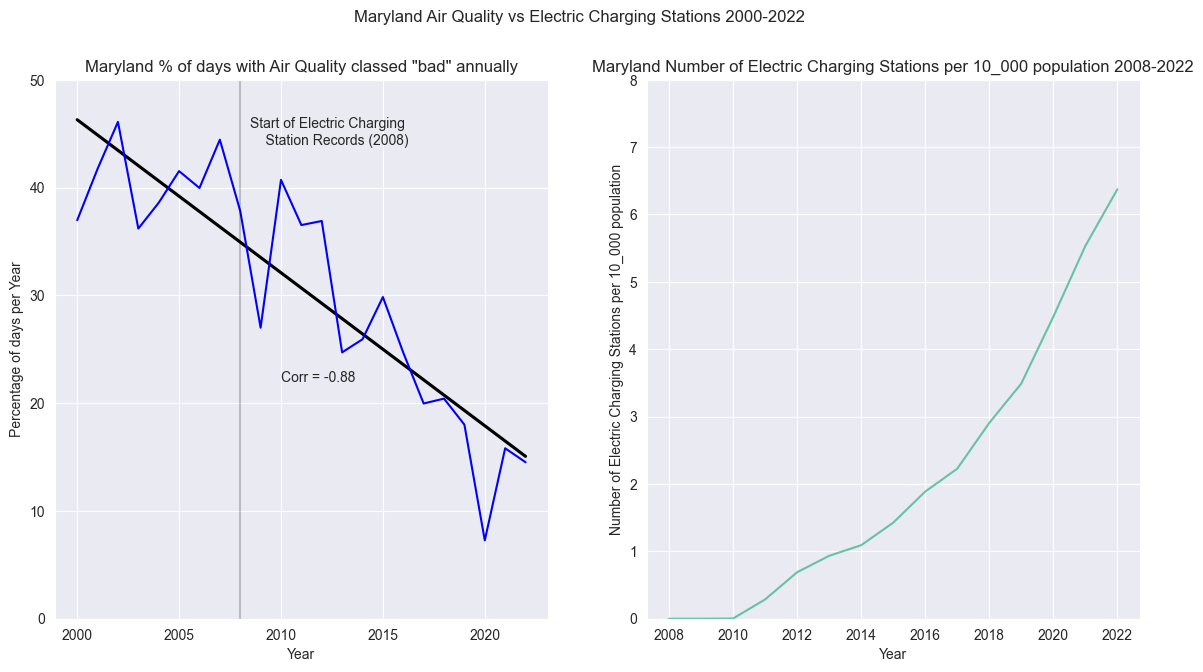

In [98]:
'''
These plots consist of a lineplot of pct_bad_days columns plotted against year and
the number of charging stations per 10_000 population.

The year that EV charging station data begins is marked with a vertical line, and a regression
line is plotted for the air quality columns to show the timewise trend.

A function is later made to create these plots automatically
'''

sns.set_style('darkgrid')
fig, axs = plt.subplots(1, 2, figsize = (14, 7))
fig.suptitle('Maryland Air Quality vs Electric Charging Stations 2000-2022')
sns.regplot(x = aq[aq.state == 'Maryland'].year, 
            y = aq[aq.state == 'Maryland'].pct_bad_days * 100,
            scatter = False,
            ci = 0,
            color = 'black',
            ax = axs[0]
        )
r, p = scp.stats.pearsonr(x = aq[aq.state == 'Maryland'].year, 
            y = aq[aq.state == 'Maryland'].pct_bad_days)
axs[0].text(2010, 22, 'Corr = {:.2f}'.format(r))

axs[0] = sns.lineplot(x = aq[aq.state == 'Maryland'].year, 
                  y = aq[aq.state == 'Maryland'].pct_bad_days * 100,
                     ax = axs[0],
                     color = 'blue')
axs[0].axvline(2008, alpha = 0.2, color = 'black')
axs[0].text(2008.5, 44, '''Start of Electric Charging 
    Station Records (2008)''', fontsize=10, zorder = 11)
axs[0].set(title = 'Maryland % of days with Air Quality classed "bad" annually', 
           xlabel = 'Year',
           ylabel = 'Percentage of days per Year')
axs[0].set_ylim(0,50)

axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == 'Maryland'].year, 
                  y = pop_stations[pop_stations.state == 'Maryland'].electric_by_pop,
                     ax = axs[1])
axs[1].set(title = 'Maryland Number of Electric Charging Stations per 10_000 population 2008-2022', 
           xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs[1].set_ylim(0,8)


- Maryland sees a sharp decline in the pct of days classes 'bad' annually, with a correlation coefficient of -0.88.
- simultaneously, we observe a non linear increase in the number of electric charging stations per 10_000 population
- The air quality data appears to be reducing before the introduction of the EV charging data however, although there is not enough data to confirm this

### Arizona

(0.0, 8.0)

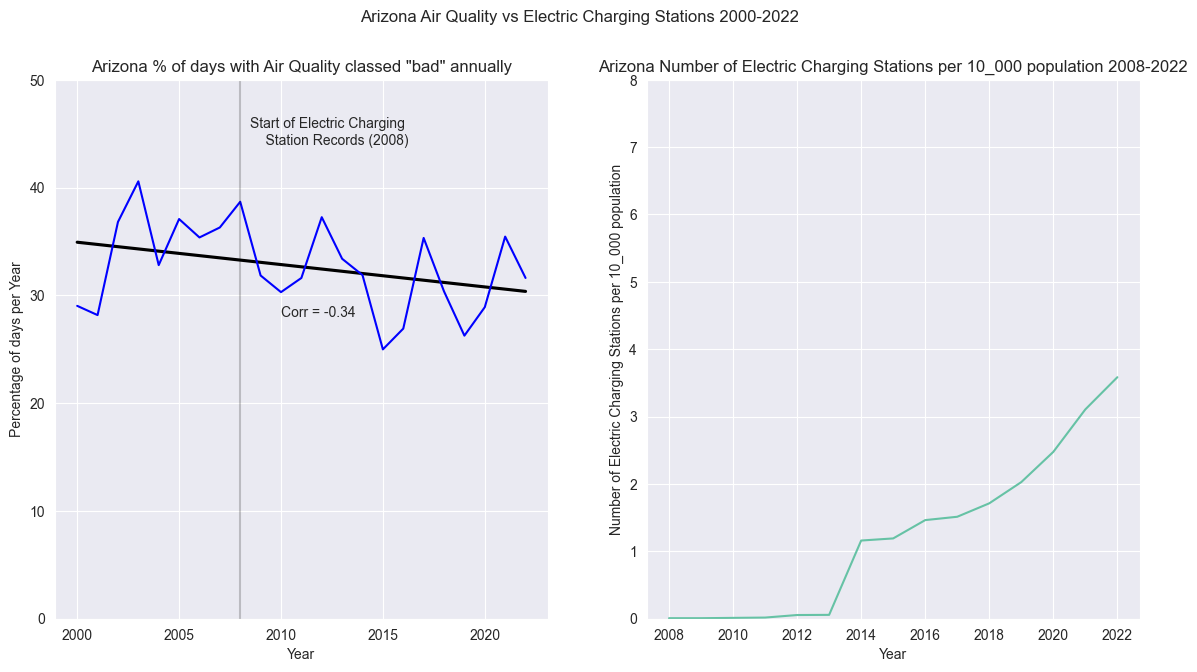

In [82]:
fig, axs = plt.subplots(1, 2, figsize = (14, 7))
fig.suptitle('Arizona Air Quality vs Electric Charging Stations 2000-2022')
sns.regplot(x = aq[aq.state == 'Arizona'].year, 
            y = aq[aq.state == 'Arizona'].pct_bad_days * 100,
            scatter = False,
            ci = 0,
            color = 'black',
            ax = axs[0]
        )
r, p = scp.stats.pearsonr(x = aq[aq.state == 'Arizona'].year, 
            y = aq[aq.state == 'Arizona'].pct_bad_days)
axs[0].text(2010, 28, 'Corr = {:.2f}'.format(r))

axs[0] = sns.lineplot(x = aq[aq.state == 'Arizona'].year, 
                  y = aq[aq.state == 'Arizona'].pct_bad_days * 100,
                    color = 'blue',
                     ax = axs[0])
axs[0].axvline(2008, alpha = 0.2, color = 'black')
axs[0].text(2008.5, 44, '''Start of Electric Charging 
    Station Records (2008)''', fontsize=10, zorder = 11)
axs[0].set(title = 'Arizona % of days with Air Quality classed "bad" annually', 
           xlabel = 'Year',
           ylabel = 'Percentage of days per Year')

axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == 'Arizona'].year, 
                  y = pop_stations[pop_stations.state == 'Arizona'].electric_by_pop, 
                     ax = axs[1])
axs[1].set(title = 'Arizona Number of Electric Charging Stations per 10_000 population 2008-2022', 
           xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs[0].set_ylim(0,50)

axs[1].set_ylim(0,8)


- Arizona appears to show much less of an improvement in air quality when compared to Maryland. We are seeing some reduction in the pct of days classed 'bad' annually, however the correlation coefficient is -0.34, and the gradient is far less steep.
- Furthermore, the EV charging station count per 10_000 population is much lower than seen in Maryland 

### California

In [83]:

aq[aq.year > 2007].head()

,state,year,days_with_aqi,max_aqi,90th_percentile_aqi,median_aqi,pct_good_days,pct_moderate_days,pct_unhealthy_for_sensitive_groups_days,pct_unhealthy_days,pct_very_unhealthy_days,pct_hazardous_days,pct_days_co,pct_days_no2,pct_days_ozone,pct_days_pm2.5,pct_days_pm10,pct_bad_days
8,Alabama,2008,267.052632,114.263158,68.421053,44.315789,0.649062,0.339415,1.057713,0.000946,0.0,0.0,0.003020,0.0,0.474684,0.501658,0.020638,0.350938
9,Alabama,2009,272.368421,98.894737,59.052632,39.473684,0.752995,0.244101,0.290424,0.000000,0.0,0.0,0.000577,0.0,0.435996,0.542251,0.021177,0.247005
10,Alabama,2010,282.263158,112.263158,70.315789,46.157895,0.606986,0.379970,1.208874,0.000955,0.0,0.0,0.000144,0.0,0.425478,0.549293,0.025085,0.393014
11,Alabama,2011,248.526316,111.526316,69.421053,42.789474,0.695727,0.290738,1.248372,0.001052,0.0,0.0,0.000288,0.0,0.566842,0.418499,0.014370,0.304273
12,Alabama,2012,263.588235,110.235294,62.176471,40.117647,0.777177,0.211164,1.101699,0.000643,0.0,0.0,0.000000,0.0,0.597273,0.392065,0.010662,0.222823


(0.0, 50.0)

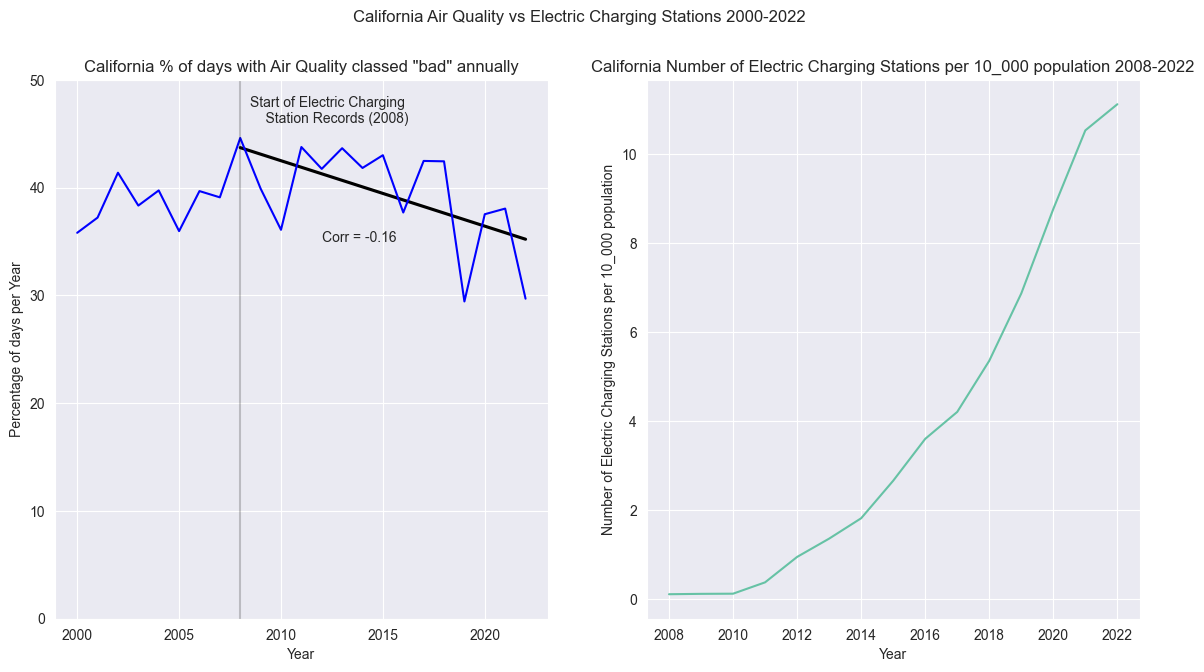

In [84]:
# For California, a regression plot was created for a masked dataframe which only included 
# air quality data from the start of EV charging station data collection

mask1 = aq.state == 'California'
mask2 = aq.year > 2007
cali_mask = (mask1) & (mask2)


fig, axs = plt.subplots(1, 2, figsize = (14, 7))
fig.suptitle('California Air Quality vs Electric Charging Stations 2000-2022')
sns.regplot(x = aq[cali_mask].year, 
            y = aq[cali_mask].pct_bad_days * 100,
            scatter = False,
            ci = 0,
            color = 'black',
            ax = axs[0]
        )
r, p = scp.stats.pearsonr(x = aq[aq.state == 'California'].year, 
            y = aq[aq.state == 'California'].pct_bad_days)
axs[0].text(2012, 35, 'Corr = {:.2f}'.format(r))
axs[0] = sns.lineplot(x = aq[aq.state == 'California'].year, 
                  y = aq[aq.state == 'California'].pct_bad_days * 100,
                    color = 'blue',
                     ax = axs[0])
axs[0].axvline(2008, alpha = 0.2, color = 'black')
axs[0].text(2008.5, 46, '''Start of Electric Charging 
    Station Records (2008)''', fontsize=10, zorder = 11)
axs[0].set(title = 'California % of days with Air Quality classed "bad" annually', 
           xlabel = 'Year',
           ylabel = 'Percentage of days per Year')


axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == 'California'].year, 
                  y = pop_stations[pop_stations.state == 'California'].electric_by_pop, 
                     ax = axs[1])
axs[1].set(title = 'California Number of Electric Charging Stations per 10_000 population 2008-2022', 
           xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs[0].set_ylim(0,50)



- California has a slight reduction in pct bad days, particularly after the start of EV charging station data collection. Before 2008, the air quality appears to be getting slightly worse.
- This trend is likely due to various factors however, for example, the initiation of data collection for EV charging stations may be due to increased initiative for an improvement in air quality.
- Calfornia has a very large number of EV charging stations per 10_000 population, and is the state in which we observe the earlist sharp increase (around 2010)

In [101]:
def make_plots(state):
    '''
    This function takes a state string as a paramater and masks each dataframe using the 
    string. Two subplots are then created with a regression plot and correlation coefficient
    for air quality plots.
    '''
    
    fig, axs = plt.subplots(1, 2, figsize = (14, 7))
    fig.suptitle(f'{state} Air Quality vs Electric Charging Stations 2000-2022')
    sns.regplot(x = aq[aq.state == state].year, 
                y = aq[aq.state == state].pct_bad_days * 100,
                scatter = False,
                ci = 0,
                color = 'black',
                ax = axs[0]
            )
    r, p = scp.stats.pearsonr(x = aq[aq.state == state].year, 
                y = aq[aq.state == state].pct_bad_days)
    axs[0].text(2010, (aq[aq.state == state].pct_bad_days.mean() * 100) + 5, 'Corr = {:.2f}'.format(r))

    axs[0] = sns.lineplot(x = aq[aq.state == state].year, 
                      y = aq[aq.state == state].pct_bad_days * 100,
                        color = 'blue',
                         ax = axs[0])
    axs[0].axvline(2008, alpha = 0.2, color = 'black')
    axs[0].text(2008.5, 44, '''Start of Electric Charging 
        Station Records (2008)''', fontsize=10, zorder = 11)
    axs[0].set(title = f'{state} % of days with Air Quality classed "bad" annually', 
               xlabel = 'Year',
               ylabel = 'Percentage of days per Year')

    axs[1] = sns.lineplot(x = pop_stations[pop_stations.state == state].year, 
                      y = pop_stations[pop_stations.state == state].electric_by_pop, 
                         ax = axs[1])
    axs[1].set(title = f'{state} Number of Electric Charging Stations per 10_000 population 2008-2022', 
               xlabel = 'Year',
               ylabel = 'Number of Electric Charging Stations per 10_000 population')
    axs[0].set_ylim(0,50)

    axs[1].set_ylim(0,8)

### Texas

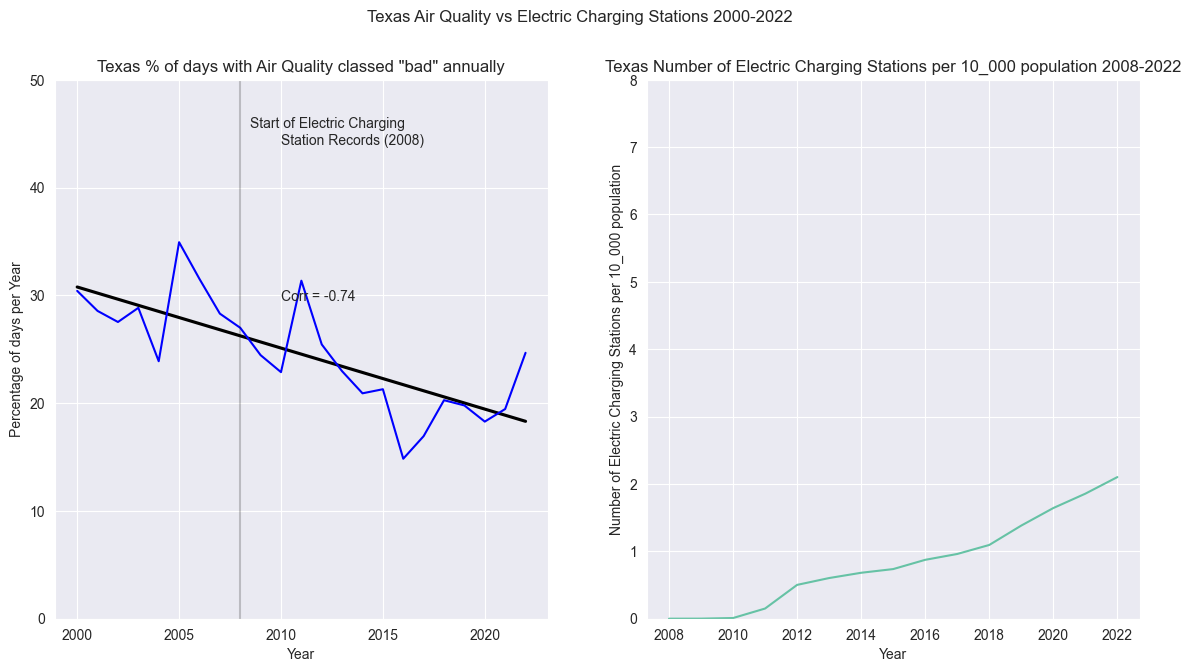

In [99]:
make_plots('Texas')

- texas shows a very low increase in EV charging stations per 10_000 population, however also records a highly correlated (-0.74) reduction in the pct of days classed 'bad' annually.
- This instance confirms that there are many factors leading to a reduction in air pollution, however nonetheless supports the theory that EV charging station numbers are one of them.

### New Mexico

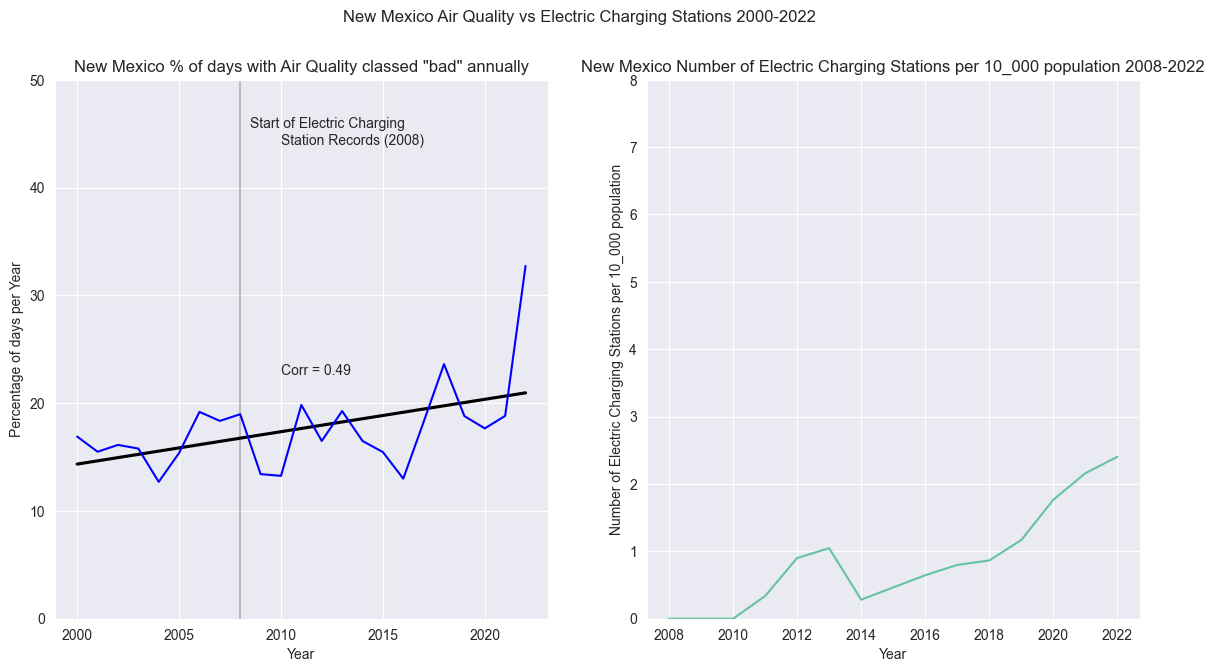

In [100]:
make_plots('New Mexico')

- New Mexico records an increase in the pct of days classed 'bad', corr coefficient 0.49.
- We also observe a very small increase in the number of installed EV charging stations.

In [87]:
cars = pd.read_csv('../output/vehicle_counts_by_state.csv')

In [88]:
cars.columns = cars.columns.str.lower()

In [89]:
cars = cars.replace(['United States', 'Northeast Region', 
              'Midwest Region', 'South Region', 'West Region', 'Alaska', 'Hawaii', 'Puerto Rico', 'District of Columbia']
            , np.nan).dropna()

In [90]:
cars.ev = cars.ev.str.replace(',','',)

In [91]:
cars.ev = cars.ev.astype(int)

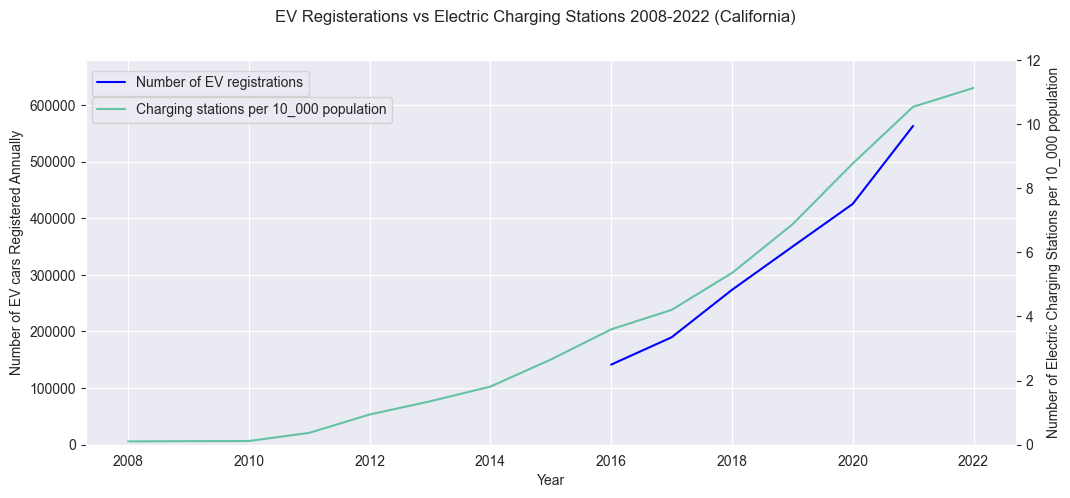

In [92]:
'''
This plot compares the number of EV charging stations per 10_000 population and the total
number of EV car registrations annually.

X axis is twinned, and axis are slightly adjusted so that lines can be seen seperately and 
clearly 
'''

fig, axs = plt.subplots(1, figsize = (12, 5))
fig.suptitle('EV Registerations vs Electric Charging Stations 2008-2022 (California)')


axs = sns.lineplot(x = cars[cars.state == 'California'].year, 
                  y = cars[cars.state == 'California'].ev,
                    color = 'blue',
                     ax = axs,
                  label = 'Number of EV registrations')


axs.set(xlabel = 'Year',
           ylabel = 'Number of EV cars Registered Annually')
axs.set_ylim(0, 680_000)
axs.legend(bbox_to_anchor = (0.247, 0.99))

ax2 = axs.twinx()
ax2.grid(False)

axs = sns.lineplot(x = pop_stations[pop_stations.state == 'California'].year, 
                  y = pop_stations[pop_stations.state == 'California'].electric_by_pop, 
                     ax = ax2,
                  label = 'Charging stations per 10_000 population')
axs.set(   xlabel = 'Year',
           ylabel = 'Number of Electric Charging Stations per 10_000 population')
axs.set_ylim(0)
axs.set_ylim(0,12)
ax2.legend(bbox_to_anchor = (0.337, 0.92))



- The increase in EV charging stations strongly correlates with the increase in EV registrations in each year. 
- This graph confirms that improving the availability of EV charging stations encourages an increase in EV registration
- However, the increase in EV registrations may be a result of many factors, such as improved technology and petrol and gas tarrifs to discourage gasoline and diesel cars.

---
#### Notebook Links

Part I - Project Intro & Data Cleaning
- [`Part-1_setup-and-cleaning.ipynb`](../code/Part-1_setup-and-cleaning.ipynb)

Part III - Modeling
- [`Part-3_modeling.ipynb`](../code/Part-3_modeling.ipynb)

Part IV - Conclusion, Recommendations, and Sources
- [`Part-4_conclusion-and-recommendations.ipynb`](../code/Part-4_conclusion-and-recommendations.ipynb)